<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/video/fft-frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright 2022 by [Jeff Heaton](https://www.heatonresearch.com/), released under [LGPLv3](https://www.gnu.org/licenses/lgpl-3.0.en.html)

[YouTube video about this code](https://www.youtube.com/watch?v=rj9NOiFLxWA)

In [3]:
pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=4b809050c4b8f0a90c655f4920153458e67e264120972c3d42592795ddeaff1c
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import scipy.io.wavfile as wav
import json
from playsound import playsound


In [5]:
# prompt: google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
NOTES_MAP = json.load(open("/content/notes-frequencies.json", "r"))


In [14]:
WAVE_LOCATION = "/content/drive/MyDrive/audio files/ධ.wav"
DURATION = 1  # Seconds
wav_file = open(WAVE_LOCATION, "rb")
SAMPLE_RATE, data = wav.read(wav_file)

In [15]:
from IPython.display import Audio
wn = Audio(WAVE_LOCATION, autoplay=True)
display(wn)

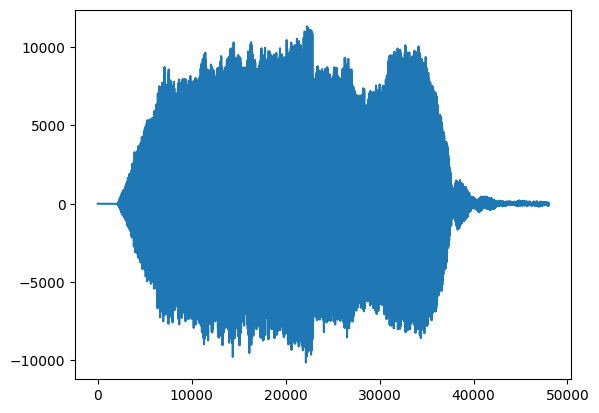

In [16]:
# Plot the time domain
t = 1 * np.arange(SAMPLE_RATE*DURATION)
plt.plot(t, data[:SAMPLE_RATE*DURATION])

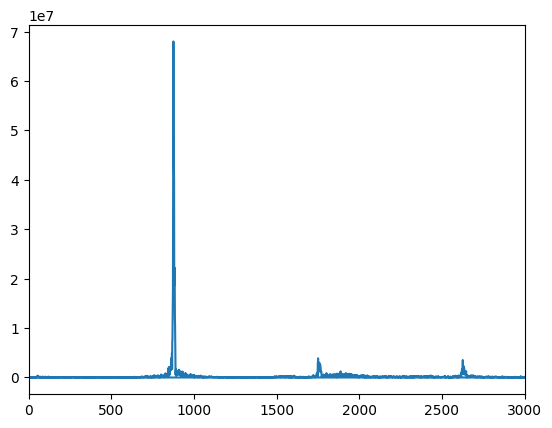

In [17]:
yf = fft(data[:SAMPLE_RATE*DURATION])
xf = fftfreq(SAMPLE_RATE*DURATION, 1 / SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.xlim([0, 3e3])
plt.show()

In [18]:
# Map frequencies to magnitude
y = np.abs(yf)

d = {}
for i in range(0, len(y)):
  if xf[i] > 0:
    d[f"{xf[i]}"] = y[i]

# Sort the dict so highest frequencies are at the top
d = sorted(d, key=d.get, reverse=True)

# Get the top 10 notes
bucket = []
for i in d:
  if len(bucket) == 10:
    break
  i = round(float(i))
  if i not in bucket:
    bucket.append(i)

# Map to notes
notes = []
for i in bucket:
  for note in NOTES_MAP:
    note_freq = NOTES_MAP[note]

    l_r = i - 4
    h_r = i + 4
    if l_r < note_freq and h_r > note_freq:
      notes.append(note)
      break

print(list(set(notes)))

['A5']
